pygame 2.5.2 (SDL 2.28.3, Python 3.11.8)
Hello from the pygame community. https://www.pygame.org/contribute.html
episode:  20 score: -1.00  average score -0.52  epsolon:  1.0  memory size 842
episode:  30 score: 6.00  average score -0.35  epsolon:  1.0  memory size 1203
episode:  40 score: -1.00  average score -0.46  epsolon:  1.0  memory size 1459
episode:  50 score: 1.00  average score -0.51  epsolon:  1.0  memory size 1745
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


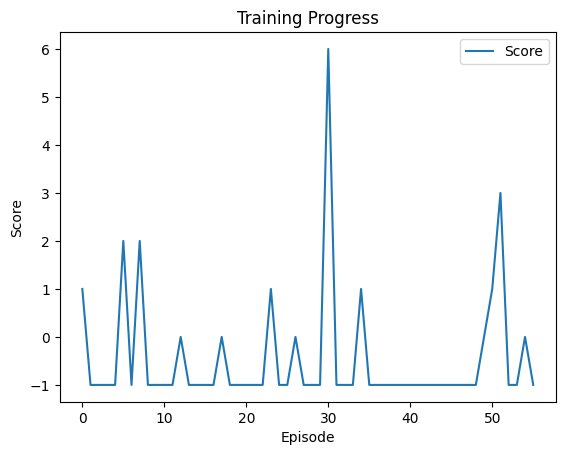

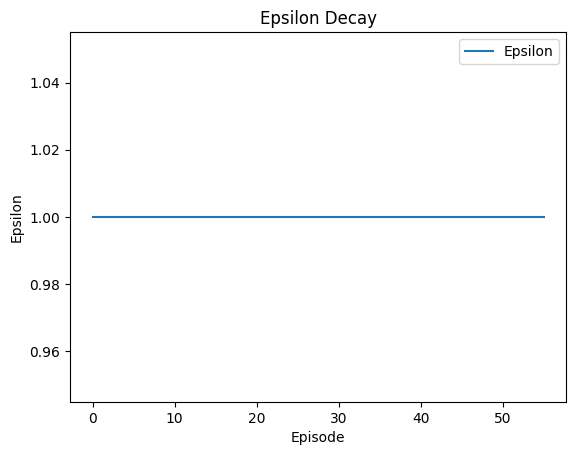

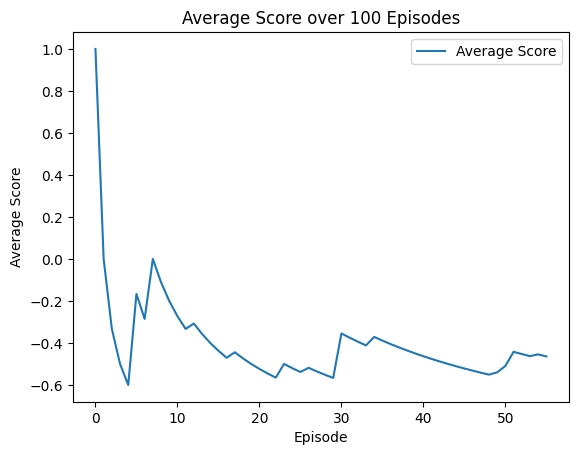

In [2]:
import matplotlib.pyplot as plt
import GameEnv
import numpy as np
import pygame
import numpy as np
from ddqn_keras import DDQNAgent
from tensorflow.keras.models import load_model
from collections import deque
import random, math

class Game:
    TOTAL_GAMETIME = 1000
    N_EPISODES = 10000
    REPLACE_TARGET = 50

    def __init__(self):
        self.game = GameEnv.RacingEnv()
        self.game.fps = 45
        self.ddqn_agent = DDQNAgent(alpha=0.0005, gamma=0.99, n_actions=5, epsilon=1.00, epsilon_end=0.10,
                                    epsilon_dec=0.9995, replace_target=self.REPLACE_TARGET, batch_size=2048, input_dims=19)
        self.ddqn_scores = []
        self.eps_history = []

    def plot_training_progress(self):
        plt.plot(np.arange(len(self.ddqn_scores)), self.ddqn_scores, label='Score')
        plt.xlabel('Episode')
        plt.ylabel('Score')
        plt.title('Training Progress')
        plt.legend()
        plt.show()

    def plot_epsilon_decay(self):
        plt.plot(np.arange(len(self.eps_history)), self.eps_history, label='Epsilon')
        plt.xlabel('Episode')
        plt.ylabel('Epsilon')
        plt.title('Epsilon Decay')
        plt.legend()
        plt.show()

    def plot_average_score(self):
        avg_scores = [np.mean(self.ddqn_scores[max(0, i-100):(i+1)]) for i in range(len(self.ddqn_scores))]
        plt.plot(np.arange(len(self.ddqn_scores)), avg_scores, label='Average Score')
        plt.xlabel('Episode')
        plt.ylabel('Average Score')
        plt.title('Average Score over 100 Episodes')
        plt.legend()
        plt.show()

    def run(self):
        for e in range(self.N_EPISODES):
            self.game.reset()
            done = False
            score = 0
            counter = 0
            observation_, reward, done = self.game.step(0)
            observation = np.array(observation_)
            gtime = 0
            renderFlag = False
            if e % 10 == 0 and e > 0:
                renderFlag = True
            while not done:
                for event in pygame.event.get():
                    if event.type == pygame.QUIT:
                        return
                action = self.ddqn_agent.choose_action(observation)
                observation_, reward, done = self.game.step(action)
                observation_ = np.array(observation_)
                if reward == 0:
                    counter += 1
                    if counter > 100:
                        done = True
                else:
                    counter = 0
                score += reward
                self.ddqn_agent.remember(observation, action, reward, observation_, int(done))
                observation = observation_
                self.ddqn_agent.learn()
                gtime += 1
                if gtime >= self.TOTAL_GAMETIME:
                    done = True
                if renderFlag:
                    self.game.render(action)
            self.eps_history.append(self.ddqn_agent.epsilon)
            self.ddqn_scores.append(score)
            avg_score = np.mean(self.ddqn_scores[max(0, e-100):(e+1)])
            if e % self.REPLACE_TARGET == 0 and e > self.REPLACE_TARGET:
                self.ddqn_agent.update_network_parameters()
            if e % 10 == 0 and e > 10:
                # self.ddqn_agent.save_model()
                # print("save model")
                  print('episode: ', e,'score: %.2f' % score, ' average score %.2f' % avg_score, ' epsolon: ',
                        self.ddqn_agent.epsilon, ' memory size', self.ddqn_agent.memory.mem_cntr % self.ddqn_agent.memory.mem_size)

if __name__ == "__main__":
    game = Game()
    game.run()
    game.plot_training_progress()
    game.plot_epsilon_decay()
    game.plot_average_score()

episode:  0 score: 2.00  average score 2.00  epsolon:  1.0  memory size 33
episode:  1 score: -1.00  average score 0.50  epsolon:  1.0  memory size 65
episode:  2 score: -1.00  average score 0.00  epsolon:  1.0  memory size 81
episode:  3 score: -1.00  average score -0.25  epsolon:  1.0  memory size 130
episode:  4 score: -1.00  average score -0.40  epsolon:  1.0  memory size 155
episode:  5 score: -1.00  average score -0.50  epsolon:  1.0  memory size 182
episode:  6 score: -1.00  average score -0.57  epsolon:  1.0  memory size 204
episode:  7 score: -1.00  average score -0.62  epsolon:  1.0  memory size 227
episode:  8 score: -1.00  average score -0.67  epsolon:  1.0  memory size 239
episode:  9 score: -1.00  average score -0.70  epsolon:  1.0  memory size 275
episode:  10 score: 3.00  average score -0.36  epsolon:  1.0  memory size 359
episode:  11 score: -1.00  average score -0.42  epsolon:  1.0  memory size 394
episode:  12 score: -1.00  average score -0.46  epsolon:  1.0  memory 

C:\S\programming\Trial\pythonProject\.venv\Lib\site-packages\keras\src\saving\saving_api.py:100: UserWarning: You are saving a model that has not yet been built. It might not contain any weights yet. Consider building the model first by calling it on some data.
  saving_lib.save_model(model, filepath)


save model
episode:  20 score: 1.00  average score -0.29  epsolon:  1.0  memory size 740
episode:  21 score: -1.00  average score -0.32  epsolon:  1.0  memory size 766
episode:  22 score: -1.00  average score -0.35  epsolon:  1.0  memory size 789
episode:  23 score: 2.00  average score -0.25  epsolon:  1.0  memory size 856
episode:  24 score: -1.00  average score -0.28  epsolon:  1.0  memory size 900
episode:  25 score: -1.00  average score -0.31  epsolon:  1.0  memory size 942
episode:  26 score: -1.00  average score -0.33  epsolon:  1.0  memory size 954
episode:  27 score: 1.00  average score -0.29  epsolon:  1.0  memory size 1004
episode:  28 score: -1.00  average score -0.31  epsolon:  1.0  memory size 1031
episode:  29 score: -1.00  average score -0.33  epsolon:  1.0  memory size 1067
save model
episode:  30 score: 0.00  average score -0.32  epsolon:  1.0  memory size 1093
episode:  31 score: -1.00  average score -0.34  epsolon:  1.0  memory size 1130
episode:  32 score: -1.00  av

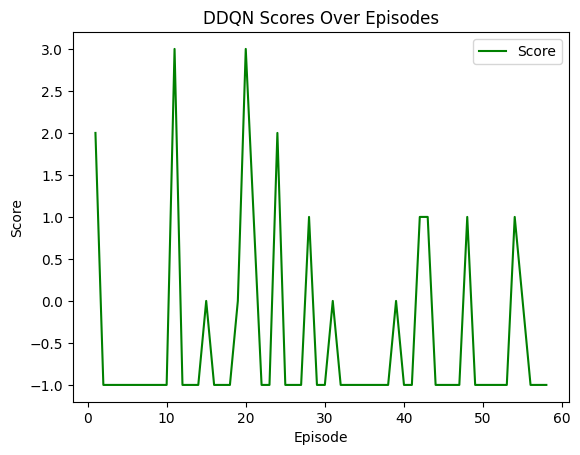

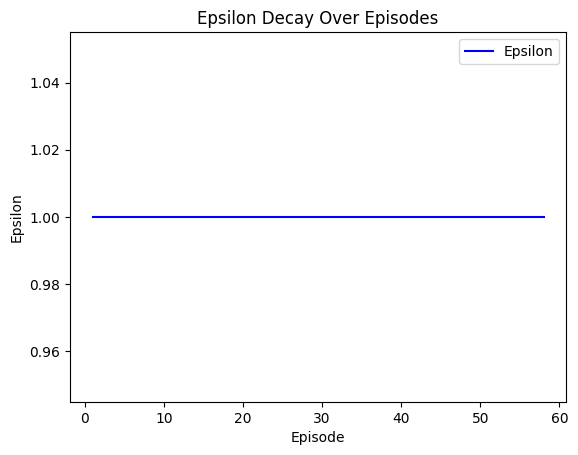

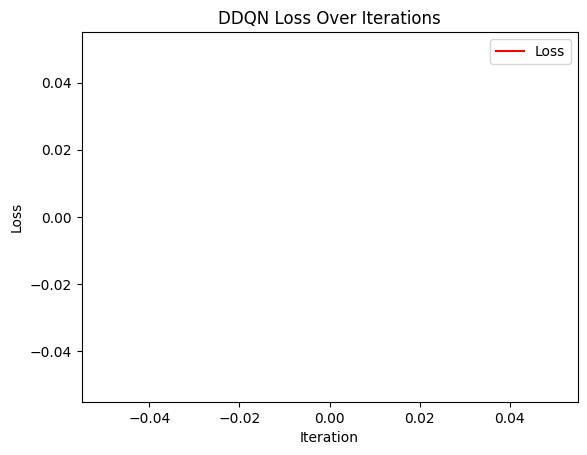

In [3]:
import GameEnv
import pygame
import numpy as np
from ddqn_keras import DDQNAgent
from tensorflow.keras.models import load_model
from collections import deque
import random, math
import matplotlib.pyplot as plt

class Game1:
    TOTAL_GAMETIME = 1000
    N_EPISODES = 10000
    REPLACE_TARGET = 50

    def __init__(self):
        self.game = GameEnv.RacingEnv()
        self.game.fps = 45
        self.ddqn_agent = DDQNAgent(alpha=0.0005, gamma=0.99, n_actions=5, epsilon=1.00, epsilon_end=0.10,
                                    epsilon_dec=0.9995, replace_target=self.REPLACE_TARGET, batch_size=2048, input_dims=19)
        self.ddqn_scores = []
        self.eps_history = []
        self.loss_history = []

    def run(self):
        for e in range(self.N_EPISODES):
            self.game.reset()
            done = False
            score = 0
            counter = 0
            observation_, reward, done = self.game.step(0)
            observation = np.array(observation_)
            gtime = 0
            renderFlag = False
            if e % 10 == 0 and e > 0:
                renderFlag = True
            while not done:
                for event in pygame.event.get():
                    if event.type == pygame.QUIT:
                        return
                action = self.ddqn_agent.choose_action(observation)
                observation_, reward, done = self.game.step(action)
                observation_ = np.array(observation_)
                if reward == 0:
                    counter += 1
                    if counter > 100:
                        done = True
                else:
                    counter = 0
                score += reward
                self.ddqn_agent.remember(observation, action, reward, observation_, int(done))
                observation = observation_
                self.ddqn_agent.learn()
                gtime += 1
                if gtime >= self.TOTAL_GAMETIME:
                    done = True
                if renderFlag:
                    self.game.render(action)
            self.eps_history.append(self.ddqn_agent.epsilon)
            self.ddqn_scores.append(score)
            avg_score = np.mean(self.ddqn_scores[max(0, e-100):(e+1)])
            if e % self.REPLACE_TARGET == 0 and e > self.REPLACE_TARGET:
                self.ddqn_agent.update_network_parameters()
            if e % 10 == 0 and e > 10:
                # self.ddqn_agent.save_model()
                # print("save model")
                  print('episode: ', e,'score: %.2f' % score, ' average score %.2f' % avg_score, ' epsolon: ',
                        self.ddqn_agent.epsilon, ' memory size', self.ddqn_agent.memory.mem_cntr % self.ddqn_agent.memory.mem_size)
            # Capture loss history
            if self.ddqn_agent.memory.mem_cntr > self.ddqn_agent.batch_size:
                state, action, reward, new_state, done = self.ddqn_agent.memory.sample_buffer(self.ddqn_agent.batch_size)
                action_values = np.array(self.ddqn_agent.action_space, dtype=np.int8)
                action_indices = np.dot(action, action_values)
                q_next = self.ddqn_agent.brain_target.predict(new_state)
                q_eval = self.ddqn_agent.brain_eval.predict(new_state)
                q_pred = self.ddqn_agent.brain_eval.predict(state)
                max_actions = np.argmax(q_eval, axis=1)
                q_target = q_pred
                batch_index = np.arange(self.ddqn_agent.batch_size, dtype=np.int32)
                q_target[batch_index, action_indices] = reward + self.ddqn_agent.gamma*q_next[batch_index, max_actions.astype(int)]*done
                loss = self.ddqn_agent.brain_eval.train(state, q_target, verbose=0).history['loss']
                self.loss_history.append(loss)

    def plot_scores(self):
        plt.plot([i+1 for i in range(len(self.ddqn_scores))], self.ddqn_scores, label='Score', color='green')
        plt.xlabel('Episode')
        plt.ylabel('Score')
        plt.title('DDQN Scores Over Episodes')
        plt.legend()
        plt.show()

    def plot_epsilon(self):
        plt.plot([i+1 for i in range(len(self.eps_history))], self.eps_history, label='Epsilon', color='blue')
        plt.xlabel('Episode')
        plt.ylabel('Epsilon')
        plt.title('Epsilon Decay Over Episodes')
        plt.legend()
        plt.show()

    def plot_loss(self):
        plt.plot([i+1 for i in range(len(self.loss_history))], self.loss_history, label='Loss', color='red')
        plt.xlabel('Iteration')
        plt.ylabel('Loss')
        plt.title('DDQN Loss Over Iterations')
        plt.legend()
        plt.show()

if __name__ == "__main__":
    game = Game1()
    game.run()
    game.plot_scores()
    game.plot_epsilon()
    game.plot_loss()

pygame 2.5.2 (SDL 2.28.3, Python 3.11.8)
Hello from the pygame community. https://www.pygame.org/contribute.html
episode:  20 score: 2.00  average score -0.62  epsolon:  1.0  memory size 727
episode:  30 score: -1.00  average score -0.65  epsolon:  1.0  memory size 967
episode:  40 score: 4.00  average score -0.54  epsolon:  1.0  memory size 1259
episode:  50 score: -1.00  average score -0.63  epsolon:  1.0  memory size 1499
episode:  60 score: -1.00  average score -0.57  epsolon:  1.0  memory size 1778
episode:  70 score: 1.00  average score -0.61  epsolon:  1.0  memory size 2040
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


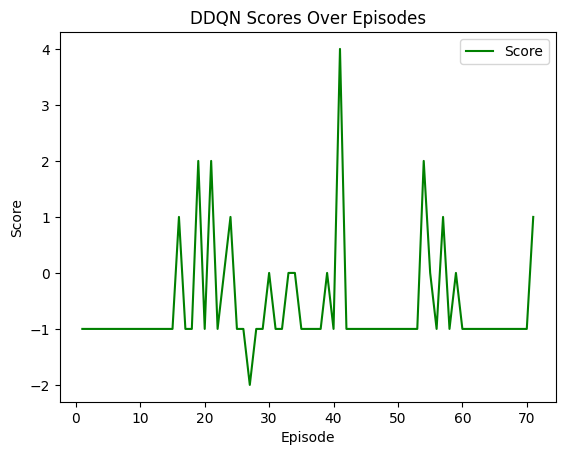

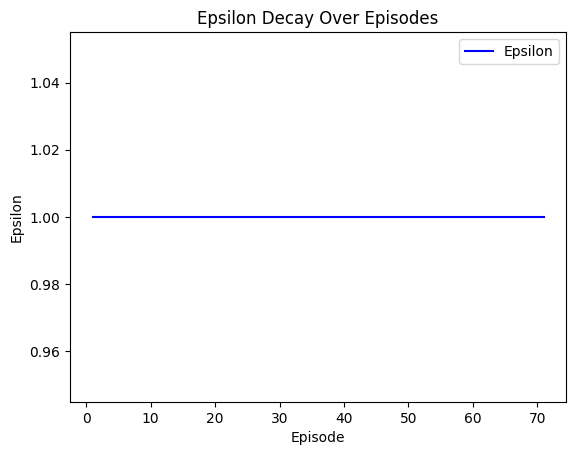

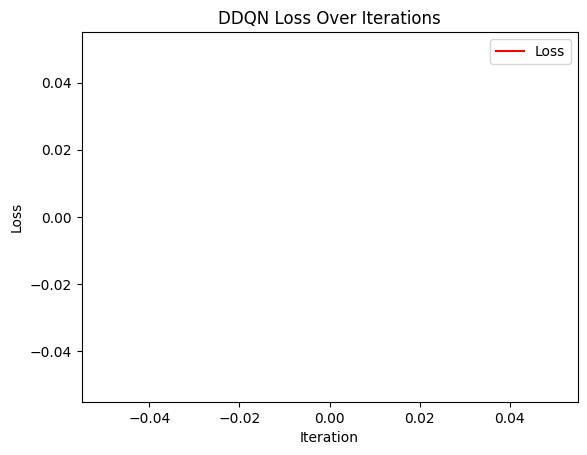

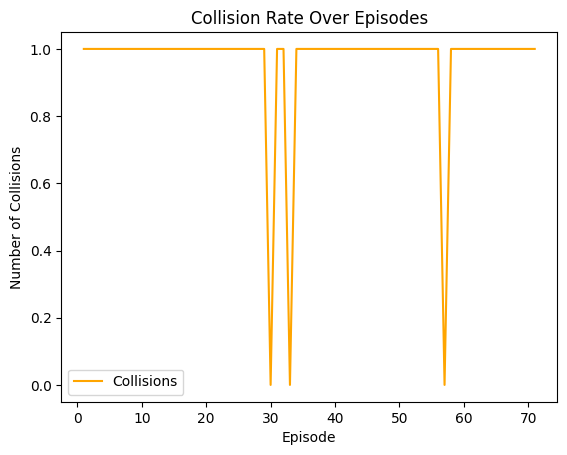

In [1]:
import GameEnv
import pygame
import numpy as np
from ddqn_keras import DDQNAgent
from tensorflow.keras.models import load_model
from collections import deque
import random, math
import matplotlib.pyplot as plt

class Game:
    TOTAL_GAMETIME = 1000
    N_EPISODES = 10000
    REPLACE_TARGET = 50

    def __init__(self):
        self.game = GameEnv.RacingEnv()
        self.game.fps = 45
        self.ddqn_agent = DDQNAgent(alpha=0.0005, gamma=0.99, n_actions=5, epsilon=1.00, epsilon_end=0.10,
                                    epsilon_dec=0.9995, replace_target=self.REPLACE_TARGET, batch_size=2048, input_dims=19)
        self.ddqn_scores = []
        self.eps_history = []
        self.loss_history = []
        self.collision_history = []

    def run(self):
        for e in range(self.N_EPISODES):
            self.game.reset()
            done = False
            score = 0
            counter = 0
            collision_count = 0
            observation_, reward, done = self.game.step(0)
            observation = np.array(observation_)
            gtime = 0
            renderFlag = False
            if e % 10 == 0 and e > 0:
                renderFlag = True
            while not done:
                for event in pygame.event.get():
                    if event.type == pygame.QUIT:
                        return
                action = self.ddqn_agent.choose_action(observation)
                observation_, reward, done = self.game.step(action)
                observation_ = np.array(observation_)
                if reward == 0:
                    counter += 1
                    if counter > 100:
                        done = True
                else:
                    counter = 0
                if reward < 0:  # Assuming negative reward indicates a collision
                    collision_count += 1
                score += reward
                self.ddqn_agent.remember(observation, action, reward, observation_, int(done))
                observation = observation_
                self.ddqn_agent.learn()
                gtime += 1
                if gtime >= self.TOTAL_GAMETIME:
                    done = True
                if renderFlag:
                    self.game.render(action)
            self.eps_history.append(self.ddqn_agent.epsilon)
            self.ddqn_scores.append(score)
            self.collision_history.append(collision_count)
            avg_score = np.mean(self.ddqn_scores[max(0, e-100):(e+1)])
            if e % self.REPLACE_TARGET == 0 and e > self.REPLACE_TARGET:
                self.ddqn_agent.update_network_parameters()
            if e % 10 == 0 and e > 10:
                # self.ddqn_agent.save_model()
                # print("save model")
                  print('episode: ', e,'score: %.2f' % score, ' average score %.2f' % avg_score, ' epsolon: ',
                        self.ddqn_agent.epsilon, ' memory size', self.ddqn_agent.memory.mem_cntr % self.ddqn_agent.memory.mem_size)
            # Capture loss history
            if self.ddqn_agent.memory.mem_cntr > self.ddqn_agent.batch_size:
                state, action, reward, new_state, done = self.ddqn_agent.memory.sample_buffer(self.ddqn_agent.batch_size)
                action_values = np.array(self.ddqn_agent.action_space, dtype=np.int8)
                action_indices = np.dot(action, action_values)
                q_next = self.ddqn_agent.brain_target.predict(new_state)
                q_eval = self.ddqn_agent.brain_eval.predict(new_state)
                q_pred = self.ddqn_agent.brain_eval.predict(state)
                max_actions = np.argmax(q_eval, axis=1)
                q_target = q_pred
                batch_index = np.arange(self.ddqn_agent.batch_size, dtype=np.int32)
                q_target[batch_index, action_indices] = reward + self.ddqn_agent.gamma*q_next[batch_index, max_actions.astype(int)]*done
                loss = self.ddqn_agent.brain_eval.train(state, q_target, verbose=0).history['loss']
                self.loss_history.append(loss)

    def plot_scores(self):
        plt.plot([i+1 for i in range(len(self.ddqn_scores))], self.ddqn_scores, label='Score', color='green')
        plt.xlabel('Episode')
        plt.ylabel('Score')
        plt.title('DDQN Scores Over Episodes')
        plt.legend()
        plt.show()

    def plot_epsilon(self):
        plt.plot([i+1 for i in range(len(self.eps_history))], self.eps_history, label='Epsilon', color='blue')
        plt.xlabel('Episode')
        plt.ylabel('Epsilon')
        plt.title('Epsilon Decay Over Episodes')
        plt.legend()
        plt.show()

    def plot_loss(self):
        plt.plot([i+1 for i in range(len(self.loss_history))], self.loss_history, label='Loss', color='red')
        plt.xlabel('Iteration')
        plt.ylabel('Loss')
        plt.title('DDQN Loss Over Iterations')
        plt.legend()
        plt.show()

    def plot_collision_rate(self):
        plt.plot([i+1 for i in range(len(self.collision_history))], self.collision_history, label='Collisions', color='orange')
        plt.xlabel('Episode')
        plt.ylabel('Number of Collisions')
        plt.title('Collision Rate Over Episodes')
        plt.legend()
        plt.show()

if __name__ == "__main__":
    game = Game()
    game.run()
    game.plot_scores()
    game.plot_epsilon()
    game.plot_loss()
    game.plot_collision_rate()
